## Initial Data Exploration


For information about the dataset, please see the main coursework. 

This notebook contains details about initial data exploration, construction, cleaning and transformation.

### Data File

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt

#### File and Prediction point

* zipfile has been saved to github repository

In [2]:
# path to zip file
zipfile_ou = '../../data/anonymisedData.zip'

# prediction point - days from start of course
prediction_point = None

#### Load data

In [3]:
# load files

def load_data(zip_file_path):
    '''Loads the data from the Open University Learning Analytics dataset zip file.'''
    
    with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
        registrations = pd.read_csv(zip_file.open('studentRegistration.csv'))
        courses = pd.read_csv(zip_file.open('courses.csv'))
        students = pd.read_csv(zip_file.open('studentInfo.csv'))
        student_vle = pd.read_csv(zip_file.open('studentVle.csv'))
        vle = pd.read_csv(zip_file.open('vle.csv'))
        student_assessments = pd.read_csv(zip_file.open('studentAssessment.csv'))
        assessments = pd.read_csv(zip_file.open('assessments.csv'))
    
    return registrations, courses, students, student_vle, vle, student_assessments, assessments

In [4]:
registrations, courses, students, student_vle, vle, student_assessments, assessments = load_data(zipfile_ou)

In [5]:
def tbl_stats(df):
    '''Prints the number of rows and columns, missing values and summary statistics for a dataframe.'''
    
    num_rows = df.shape[0]
    num_columns = df.shape[1]
    print("Number of rows:", num_rows, "\n")
    print("Number of columns:", num_columns, "\n")

    missing_values = df.isnull().sum()
    print("Missing values:\n", missing_values, "\n")

    summary_stats = df.describe()
    print("Summary statistics:\n", summary_stats, "\n")

### Student Data Table

In [6]:
tbl_stats(students)

Number of rows: 32593 

Number of columns: 12 

Missing values:
 code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64 

Summary statistics:
          id_student  num_of_prev_attempts  studied_credits
count  3.259300e+04          32593.000000     32593.000000
mean   7.066877e+05              0.163225        79.758691
std    5.491673e+05              0.479758        41.071900
min    3.733000e+03              0.000000        30.000000
25%    5.085730e+05              0.000000        60.000000
50%    5.903100e+05              0.000000        60.000000
75%    6.444530e+05              0.000000       120.000000
max    2.716795e+06              6.000000       655.000000 



In [7]:
print("There are", students.id_student.nunique(), "unique students in the dataset.")



There are 28785 unique students in the dataset.


In [6]:
import pandas as pd

#year
students['year'] = students['code_presentation'].str[:4]

# 2013
count_2013 = students[students['year'] == '2013'].shape[0]

# 2014
count_2014 = students[students['year'] == '2014'].shape[0]

# Print the counts
print("Count of students with module presentation starting with 2013:", count_2013)
print("Count of students with module presentation starting with 2014:", count_2014)


Count of students with module presentation starting with 2013: 13529
Count of students with module presentation starting with 2014: 19064


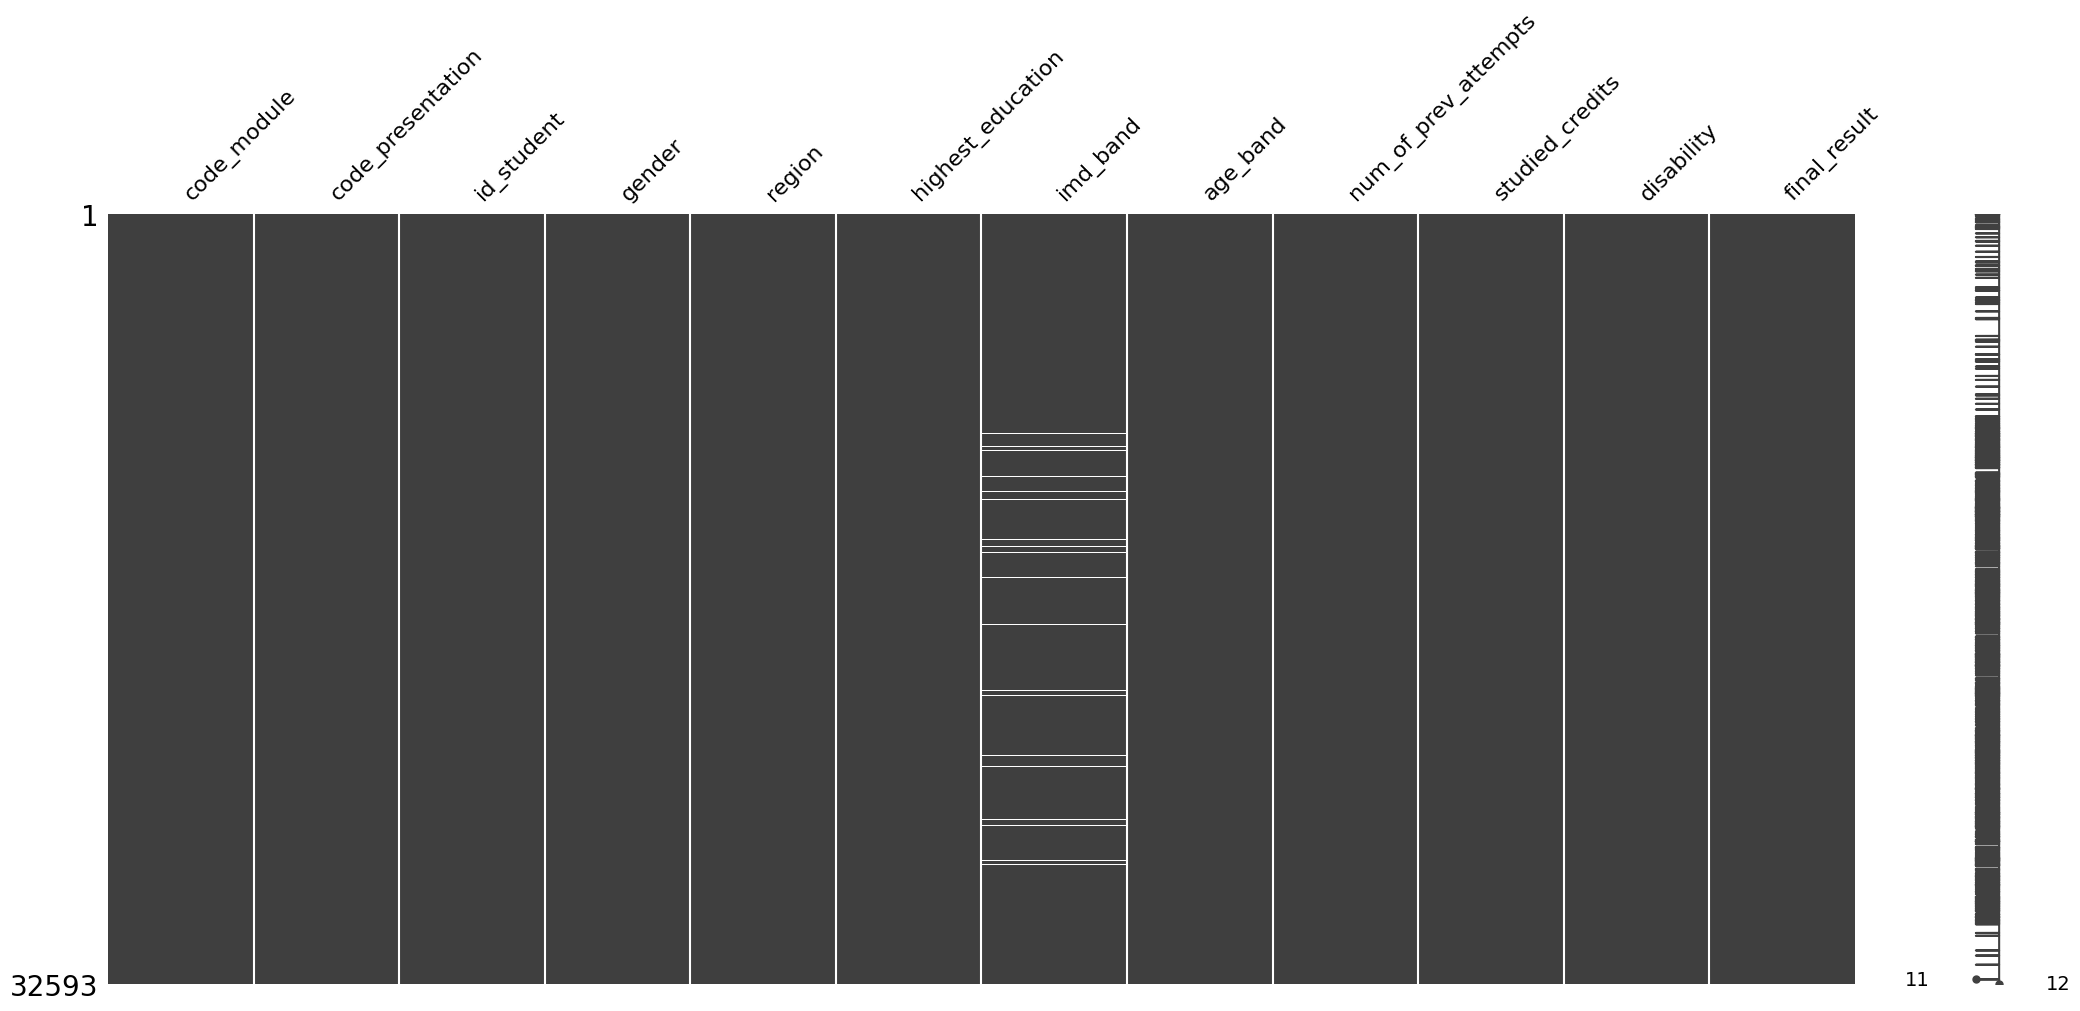

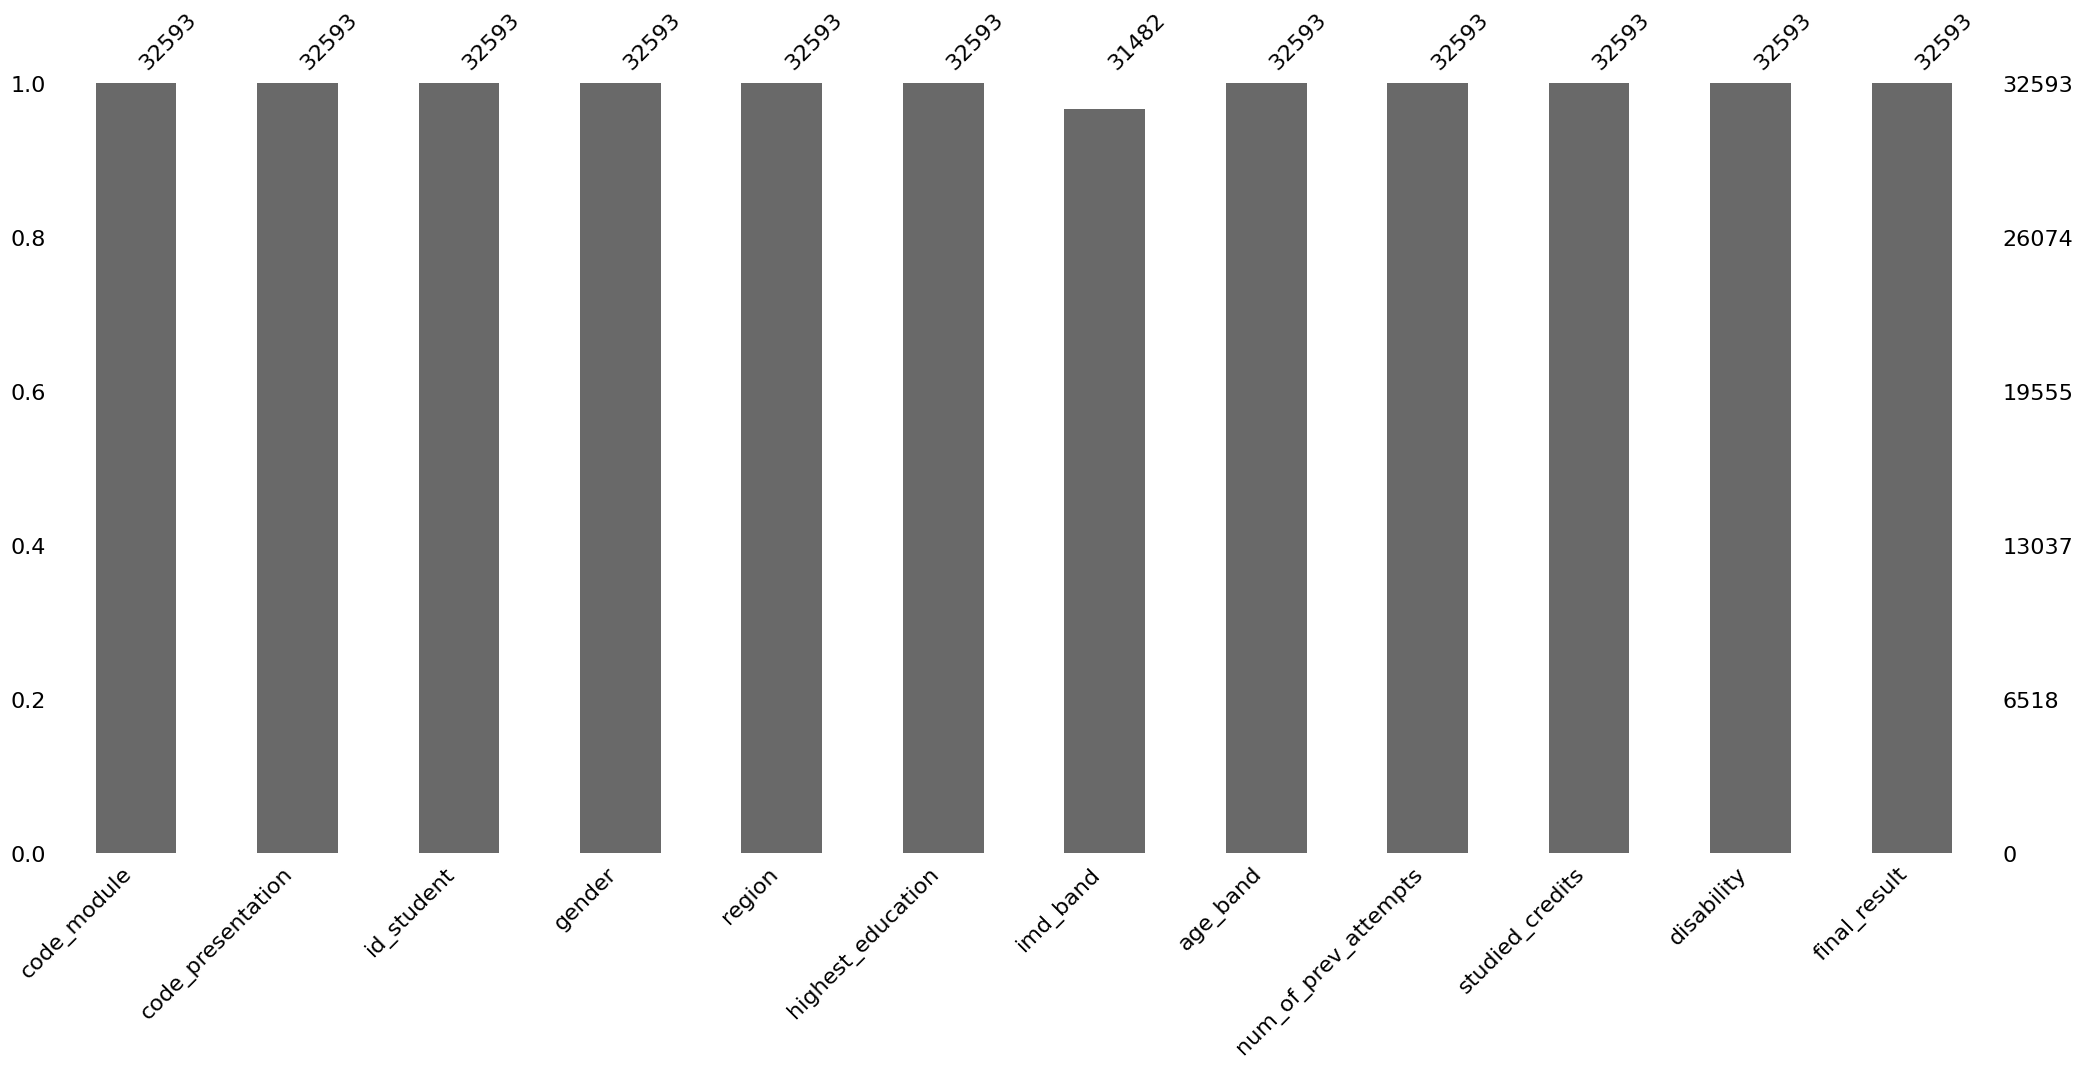

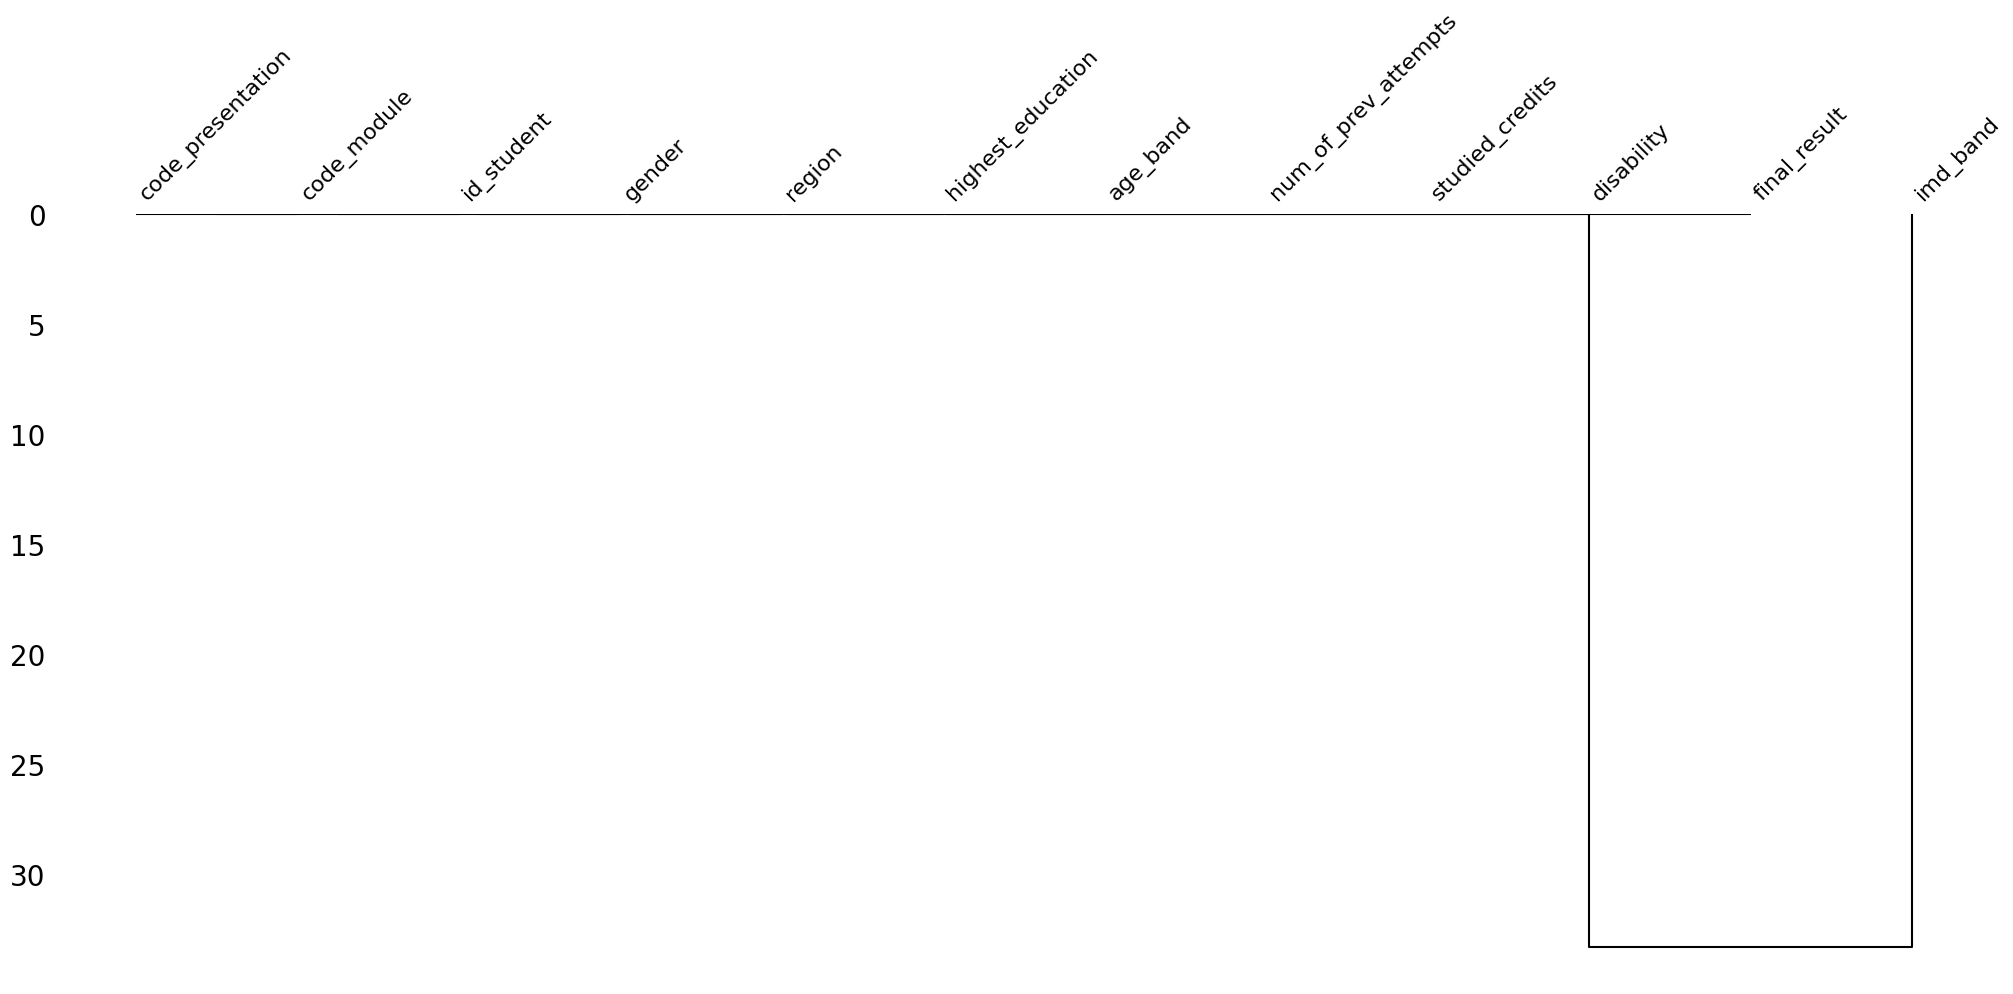

In [8]:
#%pip install missingno
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(students)
plt.show()

msno.bar(students)
plt.show()

msno.dendrogram(students)
plt.show()

### Registration Data Table

In [9]:
tbl_stats(registrations)

Number of rows: 32593 

Number of columns: 5 

Missing values:
 code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64 

Summary statistics:
          id_student  date_registration  date_unregistration
count  3.259300e+04       32548.000000         10072.000000
mean   7.066877e+05         -69.411300            49.757645
std    5.491673e+05          49.260522            82.460890
min    3.733000e+03        -322.000000          -365.000000
25%    5.085730e+05        -100.000000            -2.000000
50%    5.903100e+05         -57.000000            27.000000
75%    6.444530e+05         -29.000000           109.000000
max    2.716795e+06         167.000000           444.000000 



In [10]:


# unregistration before or on the same day as registration
registrations['unregistration_before_registration'] = registrations['date_unregistration'] <= registrations['date_registration']

# print unreg <= reg rows
unreg_before_reg = registrations[registrations['unregistration_before_registration'] == True]
#print(unreg_before_reg.head(20))

# unregistration before registration date + 14 (two weeks cool off)
registrations['unregistration_before_registration_14_days'] = registrations['date_unregistration'] <= registrations['date_registration'] + 14

# print unreg <= reg rows
unreg_before_reg_14_days = registrations[registrations['unregistration_before_registration_14_days'] == True]
#print(unreg_before_reg_14_days.head(20))
print("There are", len(unreg_before_reg), "unregistration events before or on the same day as registration.")

There are 19 unregistration events before or on the same day as registration.


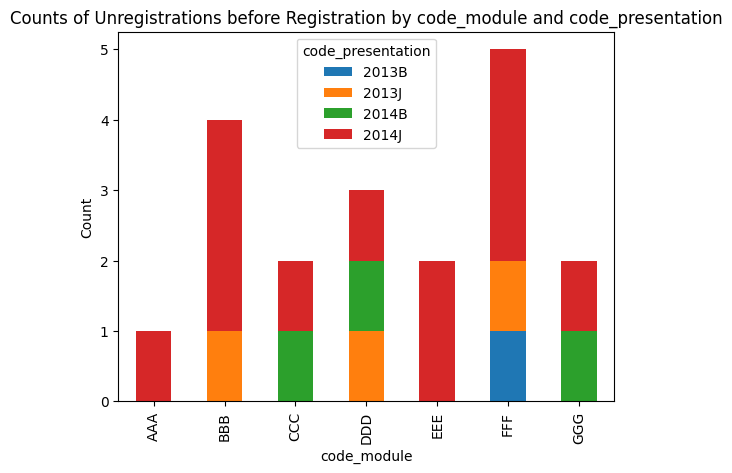

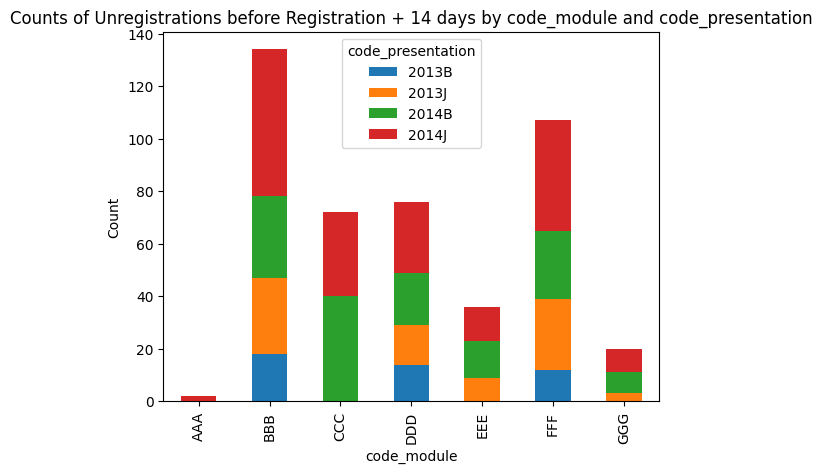

In [11]:
import matplotlib.pyplot as plt

# group  data by code_module and code_presentation, calculate the counts
grouped_counts = unreg_before_reg.groupby(['code_module', 'code_presentation']).size().unstack()

# grouped bar plot
grouped_counts.plot(kind='bar', stacked=True)
plt.xlabel('code_module')
plt.ylabel('Count')
plt.title('Counts of Unregistrations before Registration by code_module and code_presentation')
plt.legend(title='code_presentation')
plt.show()



# group  data by code_module and code_presentation, calculate the counts
grouped_counts_14 = unreg_before_reg_14_days.groupby(['code_module', 'code_presentation']).size().unstack()

# grouped bar plot
grouped_counts_14.plot(kind='bar', stacked=True)
plt.xlabel('code_module')
plt.ylabel('Count')
plt.title('Counts of Unregistrations before Registration + 14 days by code_module and code_presentation')
plt.legend(title='code_presentation')
plt.show()


As can be seen from the above two plots, there are a number of module_presentation withdrawals within two weeks of the course starting.  

There is often change and churn at the beginning of a course as reality sinks in and minds are changed.  

However, for an organisation minimising withdrawals and changes can significant.  It is expensive to recruit students and it is important to retain them.

### Clean and Merge Student and Registration Data

The first step is to combine student data with the registration data, including course information.



In [12]:

# merge students and courses
student_regist = pd.merge(students, courses, on=['code_module', 'code_presentation'], validate='many_to_one')

# merge registrations
student_regist = pd.merge(student_regist, registrations, on=['code_module', 'code_presentation', 'id_student'], how = 'left', validate='1:1')



In [13]:
registration_count = student_regist.groupby(['id_student']).size().reset_index(name='registration_count')

# students with more than one registration
students_with_multiple_registrations = registration_count[registration_count['registration_count'] > 1]

# results
#print(students_with_multiple_registrations)
print("\nThere are {} students with multiple registrations.".format(len(students_with_multiple_registrations)))


There are 3538 students with multiple registrations.


In [14]:
# check for missing values
missing_values = student_regist.isnull().sum()
print("Missing values:\n", missing_values, "\n")

Missing values:
 code_module                                       0
code_presentation                                 0
id_student                                        0
gender                                            0
region                                            0
highest_education                                 0
imd_band                                       1111
age_band                                          0
num_of_prev_attempts                              0
studied_credits                                   0
disability                                        0
final_result                                      0
module_presentation_length                        0
date_registration                                45
date_unregistration                           22521
unregistration_before_registration                0
unregistration_before_registration_14_days        0
dtype: int64 



We can see that `imd_band` adn `date_registration` have rows with missing values.  Some investigation was done into `missingness` in [data_01_initial_exploration](../V1/data_01_initial_exploration.ipynb) but the upshot is that we have no sensible way of handling this missing data (e.g. imputation), so it will be dropped.

In [15]:

# drop missing value rows (date_registration, imd_band)
student_regist.dropna(subset=['date_registration', 'imd_band'], inplace=True)


Because one of the main purposes of this model is to predict student outcome at a given point in time (`prediction_point`), it is necessary to be able to prepare the dataset for a given prediction point (measured in days from start of course).

The code block below takes a prediction_point and returns a dataframe where students who have already `withdrawn` at that time are removed.

A similar approach is needed for assessment and vle data - where events that have not yet taken place are removed, in relation to the prediction point.

In [16]:

# set default status to 'keep'
student_regist['status'] = 'keep'

# prediction point must be less than course length, integer, and greater than 0
if prediction_point is not None:
    assert isinstance(prediction_point, int) and prediction_point > 0 and prediction_point <= (max(student_regist['module_presentation_length']) + 7), "Error: Invalid prediction point.\n\nPlease provide an integer value greater than 0 and less than or equal to the maximum course length.\n\nThis is the number of days from the start of the course for which you want to predict the outcome."
    
    # withdrawn or failed before prediction point - remove
    withdrawn_fail_condition = (student_regist['final_result'].isin(['Withdrawn', 'Fail'])) & (student_regist['date_unregistration'] <= prediction_point)
    student_regist.loc[withdrawn_fail_condition, 'status'] = 'remove_outcome_known'
    
    # unregister after prediction point - keep
    unregister_after_condition = student_regist['date_unregistration'] > prediction_point
    student_regist.loc[unregister_after_condition, 'status'] = 'keep'
    
    # if no unregistration date - keep
    no_unregistration_condition = student_regist['date_unregistration'].isna()
    student_regist.loc[no_unregistration_condition, 'status'] = 'keep'
    
    # query case
    student_regist.loc[~(withdrawn_fail_condition | unregister_after_condition | no_unregistration_condition), 'status'] = 'query'


# rows which need investigation
query_rows = student_regist[student_regist['status'] == 'query'] | student_regist[student_regist['status'].isna()]

# print rows which need investigation
if not query_rows.empty:
    print("The following rows need investigation.  They are excluded from the following analysis: \n")
    print(query_rows)
    student_regist = student_regist[~student_regist.isin(query_rows)].dropna()

In [17]:
student_regist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31437 entries, 0 to 32592
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   code_module                                 31437 non-null  object 
 1   code_presentation                           31437 non-null  object 
 2   id_student                                  31437 non-null  int64  
 3   gender                                      31437 non-null  object 
 4   region                                      31437 non-null  object 
 5   highest_education                           31437 non-null  object 
 6   imd_band                                    31437 non-null  object 
 7   age_band                                    31437 non-null  object 
 8   num_of_prev_attempts                        31437 non-null  int64  
 9   studied_credits                             31437 non-null  int64  
 10  disability

At the moment, the dataset contain 31437 rows and 15 columns, as above.  

`date_unregistration` (withdrawal date) has missing values - this is because students who are still active are not withdrawn.  

The maximum end of course date (+21 days) will be added to these students so that we do not have null values.  

In [18]:

# replace missing date_unreg with module_presentation_length
student_regist['date_unregistration'] = student_regist['date_unregistration'].fillna(student_regist['module_presentation_length']+21)


In [19]:
# students who never really started
unreg_before_start = student_regist[student_regist['date_unregistration'] <= student_regist['date_registration']]

print("There were",len(unreg_before_start),"students who unregistered before or on the course start date.  These students have been removed from the analysis.")




There were 19 students who unregistered before or on the course start date.  These students have been removed from the analysis.


In [20]:

# drop students who unregistered before starting course
student_regist = student_regist[student_regist['date_unregistration'] >= student_regist['date_registration']]



The code below says how many students are removed when a prediction point is specified.

In [21]:
known_outcome = student_regist[student_regist['status'] == 'remove_outcome_known'].count()
#student_regist[student_regist['status'] == 'remove_outcome_known'].head()


print(f"There are {known_outcome['id_student']} students with a known outcome for this prediction point ({prediction_point} days from start of course). They will be removed.")

There are 0 students with a known outcome for this prediction point (None days from start of course). They will be removed.


In [22]:

# remove rows from final student which are not needed
model_final = student_regist[student_regist['status'] != 'remove_outcome_known']
   

### Course data

In [23]:
tbl_stats(courses)

Number of rows: 22 

Number of columns: 3 

Missing values:
 code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64 

Summary statistics:
        module_presentation_length
count                   22.000000
mean                   255.545455
std                     13.654677
min                    234.000000
25%                    241.000000
50%                    261.500000
75%                    268.000000
max                    269.000000 



In [24]:


# split code_presentation into year and intake columns
registrations['year'] = registrations['code_presentation'].str[:4].astype(int)
registrations['intake'] = registrations['code_presentation'].str[-1].map({'J': 'Oct', 'B': 'Feb'})


# module subject mapping
code_module_mapping = {
    'AAA': 'SocSci',
    'BBB': 'SocSci',
    'GGG': 'SocSci',
    'CCC': 'Stem',
    'DDD': 'Stem',
    'EEE': 'Stem',
    'FFF': 'Stem'
}
registrations['module_category'] = registrations['code_module'].map(code_module_mapping)

# print
print(registrations[['code_module', 'code_presentation', 'year', 'intake', 'module_category']].groupby(['code_module', 'code_presentation', 'year', 'intake', 'module_category']).size().unstack())


module_category                            SocSci    Stem
code_module code_presentation year intake                
AAA         2013J             2013 Oct      383.0     NaN
            2014J             2014 Oct      365.0     NaN
BBB         2013B             2013 Feb     1767.0     NaN
            2013J             2013 Oct     2237.0     NaN
            2014B             2014 Feb     1613.0     NaN
            2014J             2014 Oct     2292.0     NaN
CCC         2014B             2014 Feb        NaN  1936.0
            2014J             2014 Oct        NaN  2498.0
DDD         2013B             2013 Feb        NaN  1303.0
            2013J             2013 Oct        NaN  1938.0
            2014B             2014 Feb        NaN  1228.0
            2014J             2014 Oct        NaN  1803.0
EEE         2013J             2013 Oct        NaN  1052.0
            2014B             2014 Feb        NaN   694.0
            2014J             2014 Oct        NaN  1188.0
FFF         20

In terms of courses, we can see that there are 7 modules and 22 module_presentation combinations.  That is to say, there were 22 different offerings of the 7 modules.

Modules `AAA`, `BBB`, and `GGG` are `Social Sciences` and the rest are `STEM` subjects.

Module `AAA` has the fewest number of student with a minimum of 365.

### Assessment Data

In [25]:
# merge 'assessments' and 'courses' on 'code_module' and 'code_presentation'
merged_assess = assessments.merge(courses[['code_module', 'code_presentation', 'module_presentation_length']], on=['code_module', 'code_presentation'], how='left')

# value to fill in the missing 'date' values
value_to_fill = merged_assess['module_presentation_length'] - 3

# missing values in 'date' column 
#merged_assess['date'] = merged_assess['date'].fillna(value_to_fill)

# Update 'assessments' DataFrame with the filled 'date' column
assessments['date'] = merged_assess['date']

tbl_stats(assessments)


Number of rows: 206 

Number of columns: 6 

Missing values:
 code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64 

Summary statistics:
        id_assessment        date      weight
count     206.000000  195.000000  206.000000
mean    26473.975728  145.005128   20.873786
std     10098.625521   76.001119   30.384224
min      1752.000000   12.000000    0.000000
25%     15023.250000   71.000000    0.000000
50%     25364.500000  152.000000   12.500000
75%     34891.750000  222.000000   24.250000
max     40088.000000  261.000000  100.000000 



There are 206 different assessments for the 22 module_presentation combinations.

The missing assessment dates will be imputed with the end of the course date -3 days as the literature suggested that these were missing examinations in the final week of the course. 

In [26]:
# group by 'code_module' and 'code_presentation' and counting unique 'id_assessment'
counts = assessments.groupby(['code_module','code_presentation' ])['id_assessment'].nunique()

print(counts)


code_module  code_presentation
AAA          2013J                 6
             2014J                 6
BBB          2013B                12
             2013J                12
             2014B                12
             2014J                 6
CCC          2014B                10
             2014J                10
DDD          2013B                14
             2013J                 7
             2014B                 7
             2014J                 7
EEE          2013J                 5
             2014B                 5
             2014J                 5
FFF          2013B                13
             2013J                13
             2014B                13
             2014J                13
GGG          2013J                10
             2014B                10
             2014J                10
Name: id_assessment, dtype: int64


The number of assessments per module are quite different - ranging from 6 to 14.  As they differ, the individual module marks cannot be used unless modules are modelled independently.

However, number of assessments could be a feature.

In [27]:
assessments_combined = pd.merge(student_assessments, assessments, on= 'id_assessment')
#print(assessments_combined.head(20))
tbl_stats(assessments_combined)

Number of rows: 173912 

Number of columns: 10 

Missing values:
 id_assessment           0
id_student              0
date_submitted          0
is_banked               0
score                 173
code_module             0
code_presentation       0
assessment_type         0
date                 2865
weight                  0
dtype: int64 

Summary statistics:
        id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.044290e+05       51.000000       0.000000   
50%     25359.000000  5.852080e+05      116.000000       0.000000   
75%     34883.000000  6.344980e+05      173.000000       0.000000   
max     37443.000000  2.698588e+06      608.000000       1.000000   

               s

The rows with missing `score` will be dropped. 

`is_banked` - where a student brings a previous mark forward will also be dropped as there are very few of these and the meaning is unclear.



Aside from `number_of_assessments`, I also consider `average_score`.

There is something strange with submission date for assessments - that is those submitted very early or very late.  Below is a plot of where the difference between submisison date and due date is greater than 21 days.

In [28]:
# 'student_assessments' with 'courses' to get the course length
merged_data = assessments_combined.merge(courses[['code_module', 'code_presentation', 'module_presentation_length']], 
                                       on=['code_module', 'code_presentation'], how='left')

# maximum allowed date based on course length
merged_data['max_allowed_date'] = merged_data['module_presentation_length'] + 21

# number of negative date_submitted values
count_negative_dates = merged_data[merged_data['date_submitted'] < 0].shape[0]

# number of date_submitted values that are significantly larger than the due date
count_large_dates = merged_data[merged_data['date_submitted'] > merged_data['max_allowed_date']].shape[0]

# counts
print("Count of Negative date_submitted values:", count_negative_dates)
print("Count of date_submitted values 21 days after course end:", count_large_dates)




Count of Negative date_submitted values: 2057
Count of date_submitted values 21 days after course end: 69


### Clean and Merge Assessment Data

In [29]:
# merge 'assessments' and 'courses' on 'code_module' and 'code_presentation'
course_assess = pd.merge(assessments, courses, on=['code_module', 'code_presentation'], how='left')

In [30]:
# missing assessment dates
missing_assess = course_assess.isnull().sum()
print("Missing values in course_assess: \n\n{}".format(missing_assess))

Missing values in course_assess: 

code_module                    0
code_presentation              0
id_assessment                  0
assessment_type                0
date                          11
weight                         0
module_presentation_length     0
dtype: int64


In [31]:
# fill in the missing 'date' values with course final week (as per literature)
value_to_fill = course_assess['module_presentation_length'] - 3
course_assess['date'] = course_assess['date'].fillna(value_to_fill)


In [32]:

# merge student_assessments with course_assess
stu_assess = pd.merge(student_assessments, course_assess, on=['id_assessment'], how='left')


In [33]:
missing_score = stu_assess.isnull().sum()
print("Missing values in course_assess: \n\n{}".format(missing_score))

Missing values in course_assess: 

id_assessment                   0
id_student                      0
date_submitted                  0
is_banked                       0
score                         173
code_module                     0
code_presentation               0
assessment_type                 0
date                            0
weight                          0
module_presentation_length      0
dtype: int64


`assessment_type` is an interesting categorical variable which could be explored in future analyses, but for now it will be dropped.

In [34]:

# students who have no score for an assessment
missing_score_rows = stu_assess[stu_assess['score'].isna()]

print("There are",missing_score_rows['id_student'].nunique(), "students missing assessments on", len(missing_score_rows), "registrations.  The assessment rows will be removed from the analysis.")


There are 160 students missing assessments on 173 registrations.  The assessment rows will be removed from the analysis.


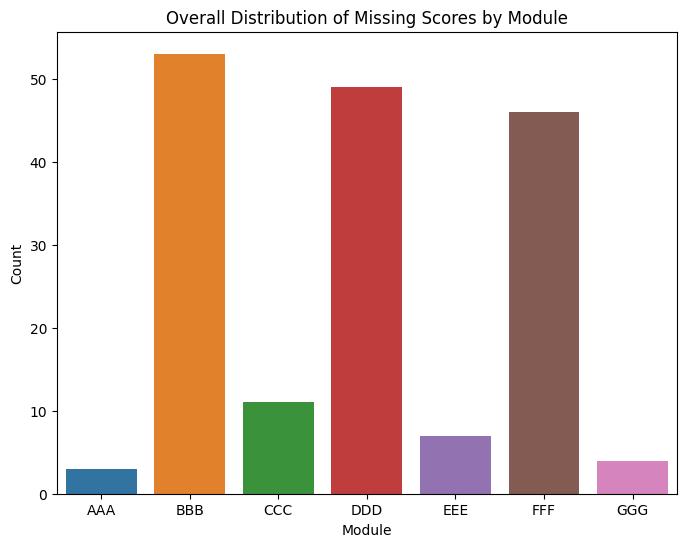

In [35]:
missing_score_rows.head()
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=missing_score_rows, x='code_module')
plt.title('Overall Distribution of Missing Scores by Module')
plt.xlabel('Module')
plt.ylabel('Count')
plt.show()

Some modules - `BBB`, `DDD` and `FFF` account for most of the missing score rows. 

In [36]:
#unique_ids_missing = missing_score_rows['id_student'].unique()
#print(unique_ids_missing)

print("\nThere are currently",model_final['id_student'].nunique(), "unique students in the dataset.")





There are currently 27784 unique students in the dataset.


In [37]:

if not missing_score_rows.empty:
    
    # student ids with missing score
    unique_ids_missing = missing_score_rows['id_student'].unique()

    print("\nThe following students have missing 'scores'. Their assessment rows will be excluded from the following analysis: \n")
    print(unique_ids_missing)

    # remove students with missing score from model_final - keeping for now and managing via inner join
    #model_final = model_final[~model_final['id_student'].isin(unique_ids_missing)]

    # drop rows with missing score
    stu_assess.dropna(subset=['score'], inplace=True)



The following students have missing 'scores'. Their assessment rows will be excluded from the following analysis: 

[ 721259  260355 2606802  186780  531205  534151  549713  554393   33666
  511527  554818  484039  262294  478317  502717  515497  501208  308703
  342685  420724  507279  525877  242893  583473  476278  352688  606501
  260955  271467  591547  291844  588039  593345  615173  190565  394331
  487543  613205  625383  628982  630549  654422  678578  693871  602448
  506679  173163  632722 1723749  688167 2410544  471018  629500  193163
  413083  548764  511350  570671  610537 2500064  546634  572783  168243
  235428  555297  357576  535707  305702  510530  518097  412731  554773
  556308  560260  191896  241771  252489  413934  415695  427248  557247
  588293  603498   77241  571765  607854 2261142  505854  524109  546299
  614217  630401  502207  607462  616542  646391  652292  676642  687765
  526699  468386  562100  636875  574347  684305  431136 2025589  578725
  59757

Date Range: 12.0 to 266.0


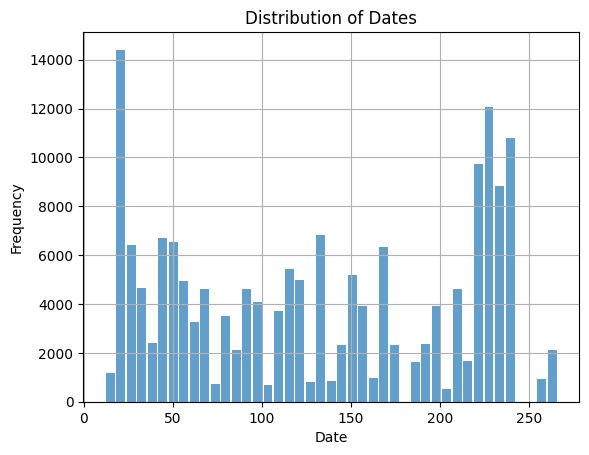

In [38]:
# assessment date range check
date_values = stu_assess['date']
print('Date Range:', date_values.min(), 'to', date_values.max())


# plotting the distribution
plt.hist(date_values, bins='auto', alpha=0.7, rwidth=0.85)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Dates')
plt.grid(True)
plt.show()

Above are the submission dates - all within course dates (start and finish).
Student submissions should be similar but with leeway either side of the due date.
However, submissions before the course starts and well after the course finishes will be excluded.  

As can be seen - there are outliers (negative days - before course started) and signficantly after it finished. 

Date Range: -11 to 608


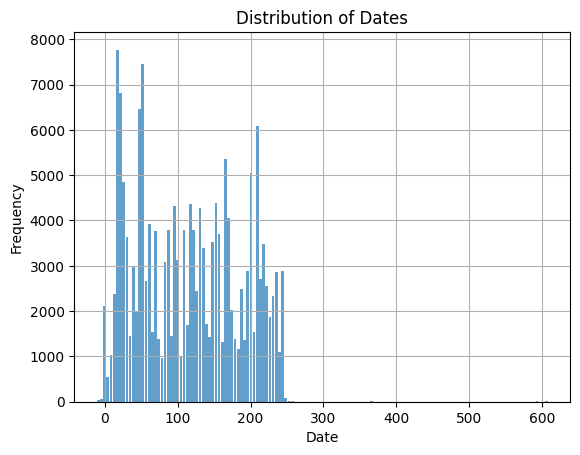

In [39]:
# assessment date range check
stu_date_values = stu_assess['date_submitted']
print('Date Range:', stu_date_values.min(), 'to', stu_date_values.max())


# plotting the distribution
plt.hist(stu_date_values, bins='auto', alpha=0.7, rwidth=0.85)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Dates')
plt.grid(True)
plt.show()

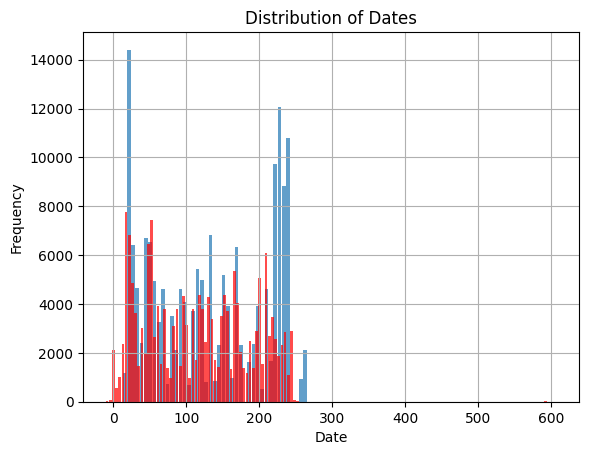

In [40]:
# plotting the distribution
plt.hist(stu_assess['date'], bins='auto', alpha=0.7, rwidth=0.85)
plt.hist(stu_assess['date_submitted'], bins='auto', alpha=0.7, rwidth=0.85, color='red')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Dates')
plt.grid(True)
plt.show()

In [41]:
# rows where date submitted is greater than date
greater_than_max_length = stu_assess[stu_assess['date_submitted'] > stu_assess['module_presentation_length']]

# groupby module_presentation
greater_than_max_length.groupby(['code_module', 'code_presentation']).count()['id_student']



code_module  code_presentation
CCC          2014B                 3
             2014J                 1
DDD          2013B                 4
             2014B                 3
             2014J                 1
FFF          2013B                25
             2013J                26
             2014B                17
             2014J                 2
Name: id_student, dtype: int64

It seems like module FFF has a different assessment structure - allowing for submissions well after module ended.

In [42]:
# assume that submissions 3 weeks after course finishes are not acceptable
max_module_length = stu_assess['module_presentation_length'].max() + 21


# remove rows where date_submitted is greater than max_module_length
stu_assess = stu_assess[stu_assess['date_submitted'] <= max_module_length]

print("There are",len(greater_than_max_length), "assessments submitted 21 days or more after the finish of a course. They are excluded from the following analysis. \n")

There are 82 assessments submitted 21 days or more after the finish of a course. They are excluded from the following analysis. 



In [43]:
# if prediction_point is None
if prediction_point is None:
    # no data reduction
    model_student_assess = stu_assess
    model_course_assess = course_assess
else:
    # prediction point must be less than course length, integer, and greater than 0
    assert isinstance(prediction_point, int) and prediction_point > 0 and prediction_point <= (max(courses['module_presentation_length'])+7), "Error: Invalid prediction point.\n\nPlease provide an integer value greater than 0 and less than or equal to the maximum course length.\n\nThis is the number of days from the start of the course for which you want to predict the outcome."

    # reduce data by prediction point
    model_student_assess = stu_assess[stu_assess['date'] <= prediction_point]
    model_course_assess = course_assess[course_assess['date'] <= prediction_point]


Below are the expected assessments for each module - calculated after prediction_point split.

In [44]:

# get expected assessment details

expected_ass = model_course_assess.groupby(['code_module', 'code_presentation'])['id_assessment'].count().reset_index()
expected_ass = expected_ass.rename(columns={'id_assessment': 'exp_sub_count'})
date_sum = model_course_assess.groupby(['code_module', 'code_presentation'])['date'].sum().reset_index()
expected_ass = expected_ass.merge(date_sum, on=['code_module', 'code_presentation'], how='left')
expected_ass = expected_ass.rename(columns={'date': 'exp_sub_date_sum'})


In [45]:

# summarise students' assessments by module_presentation
student_assessment_summary = model_student_assess.groupby(['id_student', 'code_module', 'code_presentation']).agg(
    count_id_assessment=('id_assessment', 'count'),
    sum_score=('score', 'sum'),
    sum_date=('date', 'sum')
    ).reset_index()


In [46]:

# merge student_assessment_summary and expected_ass on code_module and code_presentation
merged_assess_summary = student_assessment_summary.merge(expected_ass, on=['code_module', 'code_presentation'])


Below are possible new features for assessments, based on expected values:

* proportion of assessments submitted
* average score
* expected submission count
* distance from due date

In [47]:

# calculate the new features
merged_assess_summary['prop_submissions'] = merged_assess_summary['count_id_assessment'] / merged_assess_summary['exp_sub_count']
merged_assess_summary['avg_score'] = merged_assess_summary['sum_score'] / merged_assess_summary['exp_sub_count']
merged_assess_summary['submission_distance'] = merged_assess_summary['exp_sub_date_sum'] - merged_assess_summary['sum_date']


In [48]:

# merge with 'model_final' - inner (loses no engagement students)
#model_final = model_final.merge(merged_assess_summary, on=['id_student', 'code_module', 'code_presentation'], how='inner')

# merge with 'model_final' - left (keeps students with no engagement - NaN need updating to 0 in tidy query)
model_final = model_final.merge(merged_assess_summary, on=['id_student', 'code_module', 'code_presentation'], how='left')

  


In [49]:
model_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31437 entries, 0 to 31436
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   code_module                                 31437 non-null  object 
 1   code_presentation                           31437 non-null  object 
 2   id_student                                  31437 non-null  int64  
 3   gender                                      31437 non-null  object 
 4   region                                      31437 non-null  object 
 5   highest_education                           31437 non-null  object 
 6   imd_band                                    31437 non-null  object 
 7   age_band                                    31437 non-null  object 
 8   num_of_prev_attempts                        31437 non-null  int64  
 9   studied_credits                             31437 non-null  int64  
 10  disability

Note that several students have missing assessment data.  This will be filled in with 0 in a later stage.  These students have not necessarily withdrawn or failed - they may have just not submitted any assessments.

### VLE Data

This is classic learner analytic data - tracking student interactions with the Virtual Learning Environment (VLE).

In [50]:
tbl_stats(vle)

Number of rows: 6364 

Number of columns: 6 

Missing values:
 id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64 

Summary statistics:
             id_site    week_from      week_to
count  6.364000e+03  1121.000000  1121.000000
mean   7.260991e+05    15.204282    15.214987
std    1.283151e+05     8.792865     8.779806
min    5.267210e+05     0.000000     0.000000
25%    6.615928e+05     8.000000     8.000000
50%    7.300965e+05    15.000000    15.000000
75%    8.140162e+05    22.000000    22.000000
max    1.077905e+06    29.000000    29.000000 



There is interesting additional information - `activity_type` but it will be dropped in this analysis.  They are not consistent across modules and there are too many to be useful.  It is also not clear what they are or how they differ or how they are used or if there is an opportunity to group them.  

In [51]:
group_vle = vle.groupby(['code_module', 'code_presentation', 'activity_type'])['id_site'].count().reset_index()
group_vle.rename(columns={'id_site': 'site_count'}, inplace=True)

# Print the results
print(group_vle)


    code_module code_presentation  activity_type  site_count
0           AAA             2013J       dataplus           4
1           AAA             2013J        forumng          15
2           AAA             2013J       glossary           2
3           AAA             2013J       homepage           1
4           AAA             2013J  oucollaborate           2
..          ...               ...            ...         ...
227         GGG             2014J       homepage           1
228         GGG             2014J      oucontent          26
229         GGG             2014J           quiz           8
230         GGG             2014J       resource          63
231         GGG             2014J        subpage           5

[232 rows x 4 columns]


In [52]:

print("These are the VLE types and counts:\n")
print(vle['activity_type'].value_counts())

These are the VLE types and counts:

resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
ouelluminate        21
glossary            21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: activity_type, dtype: int64


### Clean and Merge VLE Data

In [53]:

# merge 'vle' and 'courses' on 'code_module' and 'code_presentation'
course_vle = vle.merge(courses, on=['code_module', 'code_presentation'], how='left').drop(['week_from', 'week_to'], axis=1)


In [54]:
# merge vle with student_vle
all_stu_vle = pd.merge(student_vle, course_vle, on=['id_site', 'code_module', 'code_presentation'], how='left')


In [55]:
# if prediction_point is None
if prediction_point is None:
    # no filtering
    all_stu_vle = all_stu_vle
else:
    # prediction point must be less than or equal to the maximum date
    assert isinstance(prediction_point, int) and prediction_point <= max(all_stu_vle['date']), "Error: Invalid prediction point.\n\nPlease provide an integer value less than or equal to the maximum date.\n\nThis is the cutoff date for filtering the rows."

    # filter the rows where 'date' <= 'prediction_point'
    all_stu_vle = all_stu_vle[all_stu_vle['date'] <= prediction_point]


Identify and remove vle activity after the course end date.

In [56]:
# filter the rows where 'date' is greater than 'module_presentation_length'
vle_after_done = all_stu_vle[all_stu_vle['date'] > all_stu_vle['module_presentation_length']]


In [57]:

if not vle_after_done.empty:
    print("The following rows need investigation. They are excluded from the following analysis: \n")
    print(vle_after_done)

    # match rows based on 'code_module', 'code_presentation', and 'id_student'
    matching_rows = model_final[model_final[['code_module', 'code_presentation', 'id_student']].isin(vle_after_done).all(axis=1)]

    # remove the matching rows from 'model_final'
    model_final = model_final[~model_final.index.isin(matching_rows.index)]


New features:

* number of vle activities participated in
* number of different vle types participated in
* total clicks
* days active


In [58]:

# aggregations for each column
aggregations = {
'id_site': 'count',
'activity_type': 'nunique',
'sum_click': 'sum',
'date': lambda x: x.nunique()
}

# group and apply the aggregations
grouped_stu_vle = all_stu_vle.groupby(['code_module', 'code_presentation', 'id_student']).agg(aggregations).reset_index()

# rename the columns
grouped_stu_vle.rename(columns={
'id_site': 'stu_activity_count',
'activity_type': 'stu_activity_type_count',
'sum_click': 'stu_total_clicks',
'date': 'stu_days_active'
}, inplace=True)

    

In [59]:
# number of vle types per module_presentation
group_vle = vle.groupby(['code_module', 'code_presentation'])['activity_type'].nunique().reset_index()
group_vle.rename(columns={'activity_type': 'mod_pres_vle_type_count'}, inplace=True)


In [60]:

# merge 'grouped_stu_vle' and 'group_vle' on 'code_module' and 'code_presentation'
merged_vle_summary = grouped_stu_vle.merge(group_vle, on=['code_module', 'code_presentation'], how='left')


In [61]:

# merge with 'model_final' - inner join - loses students without vle engagement
#model_final = model_final.merge(merged_vle_summary, on=['id_student', 'code_module', 'code_presentation'], how='inner')

# merge with 'model_final' - left join - keeps students without vle engagement, NaN nees updating to 0 in tidy function
model_final = model_final.merge(merged_vle_summary, on=['id_student', 'code_module', 'code_presentation'], how='left')

In [62]:
model_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31437 entries, 0 to 31436
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   code_module                                 31437 non-null  object 
 1   code_presentation                           31437 non-null  object 
 2   id_student                                  31437 non-null  int64  
 3   gender                                      31437 non-null  object 
 4   region                                      31437 non-null  object 
 5   highest_education                           31437 non-null  object 
 6   imd_band                                    31437 non-null  object 
 7   age_band                                    31437 non-null  object 
 8   num_of_prev_attempts                        31437 non-null  int64  
 9   studied_credits                             31437 non-null  int64  
 10  disability

### Tidy and Merge Data

In [63]:

# new columns for module_presentation - subject, year, month
model_final['year'] = model_final['code_presentation'].str[:4].astype(int)
model_final['month'] = model_final['code_presentation'].str[-1].map({'J': 'Oct', 'B': 'Feb'})

# module subject mapping
code_module_mapping = {
        'AAA': 'SocSci',
        'BBB': 'SocSci',
        'GGG': 'SocSci',
        'CCC': 'Stem',
        'DDD': 'Stem',
        'EEE': 'Stem',
        'FFF': 'Stem'
    }
model_final['subject'] = model_final['code_module'].map(code_module_mapping)

    

In [64]:
# rename 'module_presentation_length' to 'course_length'
model_final.rename(columns={'module_presentation_length': 'course_length'}, inplace=True)


In [65]:

# move 'final_result' to the last column
final_result_column = model_final.pop('final_result')
model_final['final_result'] = final_result_column


In [66]:

# drop columns: 'count_id_assessment', 'sum_score', 'sum_date', 'exp_sub_count', 'exp_sub_date_sum'
model_final.drop(columns=['count_id_assessment', 'sum_score', 'sum_date', 'exp_sub_count', 'exp_sub_date_sum', 'status'], inplace=True)

# change year to categorical type
model_final['year'] = model_final['year'].astype(str)

# replace NaN values with 0 - these are students who did not engage (vle, assessment)
model_final.fillna(0, inplace=True)

In [67]:
model_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31437 entries, 0 to 31436
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   code_module                                 31437 non-null  object 
 1   code_presentation                           31437 non-null  object 
 2   id_student                                  31437 non-null  int64  
 3   gender                                      31437 non-null  object 
 4   region                                      31437 non-null  object 
 5   highest_education                           31437 non-null  object 
 6   imd_band                                    31437 non-null  object 
 7   age_band                                    31437 non-null  object 
 8   num_of_prev_attempts                        31437 non-null  int64  
 9   studied_credits                             31437 non-null  int64  
 10  disability

### Save to csv option

In [68]:
# save to file
# final_model_PredictionPoint_date.csv
model_final.to_csv('../../data/final_model_ALL_20230526.csv', index=False)

### Summary

That concludes the first iteration of data preparation. 

There are decisions to make in terms of features to keep and features to drop.

There are also some adjustments which need to be made but they will surface and be described during the next data phases - EDA and Feature Engineering.